In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, re, subprocess, sys, json, glob
#from molmod import *
#from molmod.io import FCHKFile
#from molmod.io.xyz import XYZReader, XYZFile
import requests
#import wts
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score # klein geschrieben =>klasse
from sklearn.model_selection import KFold

from matplotlib import gridspec
import matplotlib

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [59]:
def objecthash(df, col1, col2):
    dfb = pd.DataFrame({col2:df[col2].value_counts().index})
    for c1 in df[col1].value_counts().index:
        ls = []
        for c2 in df[col2].value_counts().index:
            try:
               # print(c1,c2,df.groupby([col1,col2]).size().loc[c1].loc[c2])
                ls.append(df.groupby([col1,col2]).size().loc[c1].loc[c2])
            except:
                #print(c1,c2,0)
                ls.append(0)
        dfb[c1] = ls
    
    dfb = dfb.set_index(col2)
    return dfb
            

In [60]:
def hashmap(dflg,col1,col2):
    #sns.set (rc = {'figure.figsize':(8, 5)})
    ax = sns.heatmap(objecthash(dflg,col1,col2),linewidths=0.5,annot= True)#,yticklabels=1)
    #ax = sns.heatmap(objecthash(dflg,col1,col2),annot= True)#,yticklabels=1)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    #sns.set(font_scale=200)
    ax.set_xlabel(col1)
    
    return ax

In [8]:
plots = "/home/hagen/Masterarbeit/Arbeit/MasterThesis/img/results/"
#plots = "plots/"

In [9]:
plotab = f'{plots}tables/'

In [10]:
HH = "*_HIS/HIS"
CHM = "C_His/Met"
BHIS = "B_-/HIS"

In [11]:
scatterdict = {HH:{"marker" :  "D"},
           BHIS:{"marker" :  "d"},
           CHM:{ "marker" :  "v"},
           "other":{"c":(0,0,0),"marker":"o"}}


In [12]:
def p2(X):
    try:
        x = X.values
    except:
        x=X
    xmi,xma, ymi,yma = x[:,0].min()-1,x[:,0].max()+1,x[:,1].min()-1,x[:,1].max()+1
    xx, yy = np.meshgrid( np.linspace(xmi,xma,100), np.linspace(ymi,yma,100))
    dft = pd.DataFrame({"X1":xx.ravel(), "Y1":yy.ravel()})
    return xx,yy,dft

In [13]:
ruffling = "ruffling"
redox = "$E_{red}^{lit}$" 

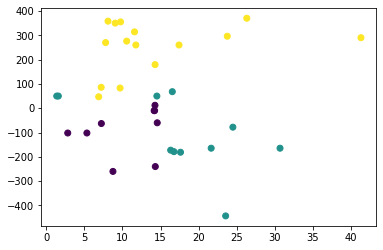

In [15]:
df = pd.read_csv("df2.csv")
df  = df[df["Kategorie2"]!= "other"]

dic = {'C_His/Met':1, 'B_-/HIS':0, '*_HIS/HIS':-1}

df["Kat"]=[dic[i]for i in df["Kategorie2"]]

plt.scatter(df["ruffling"],df["Em_lit"], c = df["Kat"])

In [44]:
df = pd.read_csv("df2.csv")
#df  = df[df["Kategorie2"]!= "other"]

In [72]:
X = df[[f"diff_{i}_nbo" for i in [1,2,5,6]]+["ruffling","saddling"]].values
scaler =  StandardScaler()
x_transformed = scaler.fit_transform(X)
model  =KMeans(n_clusters = 4)
model.fit(x_transformed)
cluster1 = model.cluster_centers_
cluster2 = scaler.inverse_transform(model.cluster_centers_) 

In [65]:
model.labels_

array([2, 3, 2, 3, 3, 1, 2, 0, 3, 0, 3, 2, 0, 0, 1, 1, 3, 1, 3, 3, 2, 3,
       1, 2, 2, 3, 2, 3, 2, 2, 0, 0, 1, 3, 3, 3, 1, 3, 2, 2, 0, 0, 3, 3,
       3, 1, 3, 1, 0, 3, 3, 3], dtype=int32)

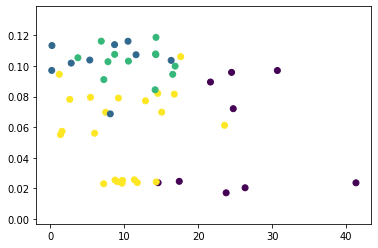

In [66]:
plt.scatter(df["ruffling"], df["diff_1_nbo"],c = model.labels_)

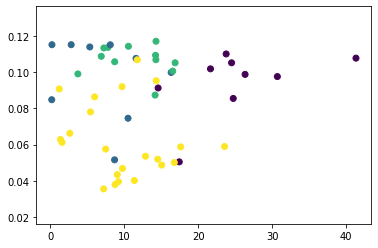

In [67]:
plt.scatter(df["ruffling"], df["diff_2_nbo"],c = model.labels_)

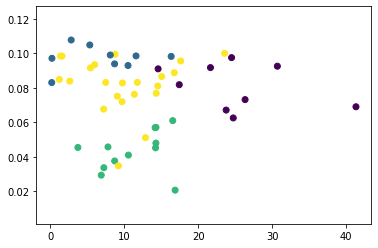

In [68]:
plt.scatter(df["ruffling"], df["diff_5_nbo"],c = model.labels_)

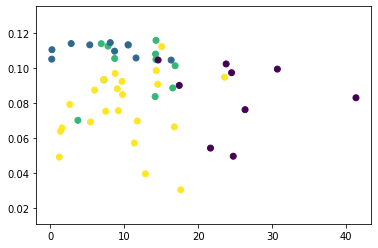

In [69]:
plt.scatter(df["ruffling"], df["diff_6_nbo"],c = model.labels_)

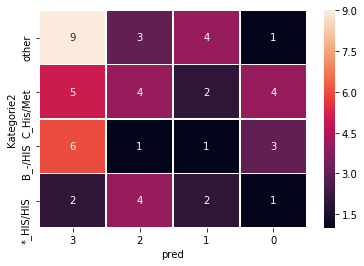

In [70]:
df["pred"] = model.labels_

hashmap(df,"pred","Kategorie2")

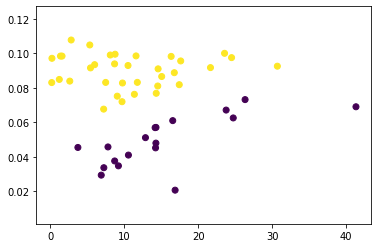

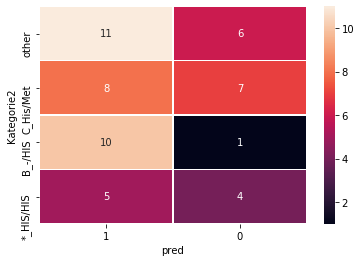

In [84]:
X = df[[f"diff_{i}_nbo" for i in [5]]+["ruffling"]].values
scaler =  StandardScaler()
x_transformed = scaler.fit_transform(X)
model  =KMeans(n_clusters = 2)
model.fit(x_transformed)
cluster1 = model.cluster_centers_
cluster2 = scaler.inverse_transform(model.cluster_centers_) 

plt.scatter(df["ruffling"], df["diff_5_nbo"],c = model.labels_)
plt.show()
df["pred"] = model.labels_

hashmap(df,"pred","Kategorie2")

In [40]:
fig  =plt.figure(dpi = 150)

X = df[["ruffling","saddling","Em_lit"]]
X = df[["ruffling","Em_lit"]]

krange = [kn for kn in range(1,20)] 
df1 = []

for X in [df[["ruffling","saddling","Em_lit"]], df[["ruffling","Em_lit"]]]:
    y = df[["Kategorie2"]]
    y = [dic[i]for i in df["Kategorie2"]]

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)

    scaler = StandardScaler()
    scaler.fit(X)

    X_trains = scaler.transform(X_train)
    X_tests = scaler.transform(X_test)
    Xs = scaler.transform(X)
    df1.append([np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=kn), Xs, y, cv = KFold(n_splits = 10))) for kn in krange])
    #plt.plot([np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=kn), Xs, y, cv = KFold(n_splits = 10))) for kn in krange])
d = pd.DataFrame(np.array(df1), index= ["ruf,Em_lit","ruf,sad,Em_lit"])
d.columns=krange
model = KNeighborsClassifier()
model.fit(X_trains, y_train)
pred = model.predict(Xs)
xx,yy,dft  =p2(Xs)
pred2 = model.predict(dft)

xx,yy =p2(X)[:2]
plt.scatter(xx.ravel(),yy.ravel(),c =pred2,alpha=0.1)
#plt.scatter(*p2(X)[:2],c =pred2,alpha=0.1)

#plt.scatter(Xs[:,0],Xs[:,1],c = y,edgecolor ="black")
plt.scatter(X.values[:,0],X.values[:,1],c = y,edgecolor ="black")
plt.xlabel(ruffling)
plt.ylabel(redox)
plt.title(f"k-nearest neighbors algorithm k = {model.n_neighbors}")
for a,h in zip(range(0,3),[HH,BHIS,CHM]):
    dfc = df[df["Kategorie2"]==h]
    cmap = matplotlib.cm.get_cmap('viridis')
    #plt.sc
    rgba = cmap(0.5*a)
    print(rgba,a)
    #plt.scatter([2],[a],c=[rgba],label=[HH,BHIS,CHM][a],alpha=1,vmax=40,zorder=-40)
    plt.scatter(dfc.iloc[0][["ruffling"]],dfc.iloc[0][["Em_lit"]],c=[rgba],label=[HH,BHIS,CHM][a],alpha=1,vmax=40,zorder=-40)

plt.savefig(f"{plots}KNN.png")
plt.legend()
plt.show()
d.to_csv(f"{plotab}KNN.csv")
d    

KeyError: 'other'

<Figure size 900x600 with 0 Axes>

In [ ]:


# generate some data

y =df["Kat"]
# plot it
fig = plt.figure(figsize=(10,5),dpi=150) 
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1]) 
ax0 = plt.subplot(gs[0])
ax0.scatter(xx.ravel(),yy.ravel(),c =pred2,alpha=0.1,marker="s",s=100)

ax0.scatter(X.values[:,0],X.values[:,1],c = y,edgecolor ="black")
ax1 = plt.subplot(gs[1])
ax1.table(d.round(4).T.values, loc='center',fontsize =200,rowLabels=[str(s+1)for s in range(19)],colLabels=["ruff,E","ruff,sad,E"],colWidths=[0.2,0.25])
ax1.axis("off")  
ax0.set_xlabel(ruffling)
ax0.set_ylabel(redox)
#ax0.set_title("Random Forest")
#ax0.set_title(f"RandomForestClassifier n_estimators = {model.n_estimators}")
ax0.set_title(f"KNN = {model.n_neighbors}")

for a,h in zip(range(0,3),[HH,BHIS,CHM]):
    dfc = df[df["Kategorie2"]==h]
    cmap = matplotlib.cm.get_cmap('viridis')
    #plt.sc
    rgba = cmap(0.5*a)
    #print(rgba,a)
    #plt.scatter([2],[a],c=[rgba],label=[HH,BHIS,CHM][a],alpha=1,vmax=40,zorder=-40)
    ax0.scatter(dfc.iloc[0][["ruffling"]],dfc.iloc[0][["Em_lit"]],c=[rgba],label=[HH,BHIS,CHM][a],alpha=1,vmax=40,zorder=-40)
ax0.legend()
plt.tight_layout()
fig.savefig(f"{plots}KNN.png")


(0.267004, 0.004874, 0.329415, 1.0) 0
(0.127568, 0.566949, 0.550556, 1.0) 1
(0.993248, 0.906157, 0.143936, 1.0) 2


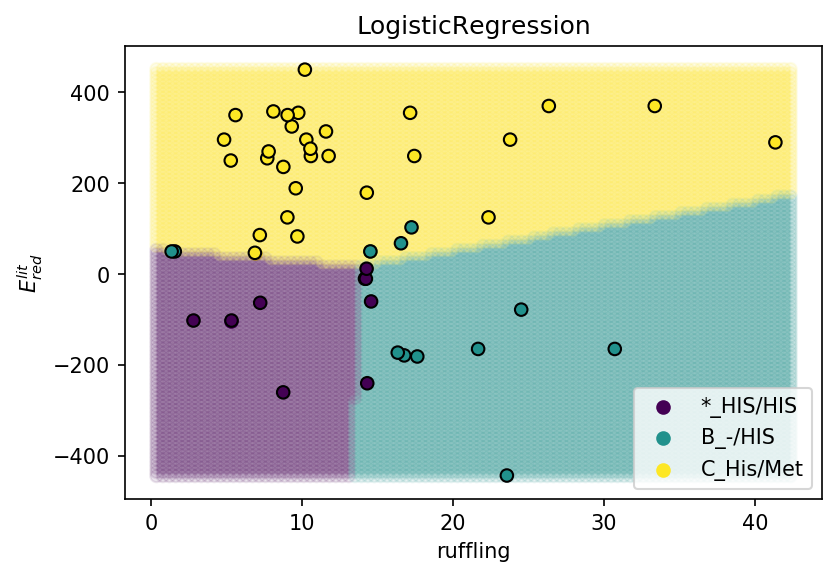

0
ruf,Em_lit      0.72
ruf,sad,Em_lit  0.78

In [11]:
fig  =plt.figure(dpi = 150)

X = df[["ruffling","saddling","Em_lit"]]
X = df[["ruffling","Em_lit"]]

krange = [kn for kn in range(1,20)]
krange = [1]
df1 = []

for X in [df[["ruffling","saddling","Em_lit"]], df[["ruffling","Em_lit"]]]:
    y = df[["Kategorie2"]]
    y = [dic[i]for i in df["Kategorie2"]]

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)

    scaler = StandardScaler()
    scaler.fit(X)

    X_trains = scaler.transform(X_train)
    X_tests = scaler.transform(X_test)
    Xs = scaler.transform(X)
    df1.append([np.mean(cross_val_score(LogisticRegression(), Xs, y, cv = KFold(n_splits = 10))) for kn in krange])
    #plt.plot([np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=kn), Xs, y, cv = KFold(n_splits = 10))) for kn in krange])
d = pd.DataFrame(np.array(df1), index= ["ruf,Em_lit","ruf,sad,Em_lit"])

model = LogisticRegression()
model.fit(X_trains, y_train)
pred = model.predict(Xs)
xx,yy,dft  =p2(Xs)
pred2 = model.predict(dft)

xx,yy =p2(X)[:2]
plt.scatter(xx.ravel(),yy.ravel(),c =pred2,alpha=0.1)
#plt.scatter(*p2(X)[:2],c =pred2,alpha=0.1)

#plt.scatter(Xs[:,0],Xs[:,1],c = y,edgecolor ="black")
plt.scatter(X.values[:,0],X.values[:,1],c = y,edgecolor ="black")
plt.xlabel(ruffling)
plt.ylabel(redox)
plt.title("LogisticRegression")

for a,h in zip(range(0,3),[HH,BHIS,CHM]):
    dfc = df[df["Kategorie2"]==h]
    cmap = matplotlib.cm.get_cmap('viridis')
    #plt.sc
    rgba = cmap(0.5*a)
    print(rgba,a)
    #plt.scatter([2],[a],c=[rgba],label=[HH,BHIS,CHM][a],alpha=1,vmax=40,zorder=-40)
    plt.scatter(dfc.iloc[0][["ruffling"]],dfc.iloc[0][["Em_lit"]],c=[rgba],label=[HH,BHIS,CHM][a],alpha=1,vmax=40,zorder=-40)

#plt.savefig(f"{plots}LogisticRegression.png")
plt.legend()
plt.show()
d.to_csv(f"{plotab}LogisticRegression.csv")
fig.savefig(f"{plots}LogisticRegression.png")

d    

(0.267004, 0.004874, 0.329415, 1.0) 0
(0.127568, 0.566949, 0.550556, 1.0) 1
(0.993248, 0.906157, 0.143936, 1.0) 2


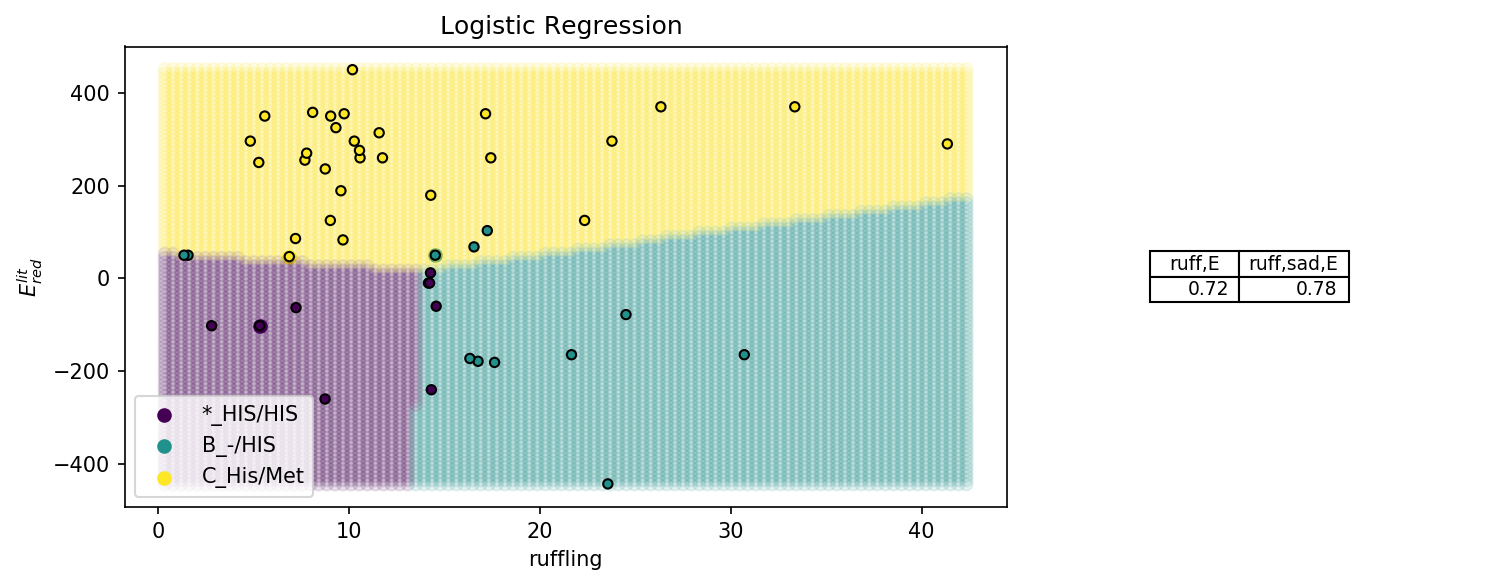

In [12]:


# generate some data

y =df["Kat"]
# plot it
fig = plt.figure(figsize=(10,4),dpi=150) 
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1]) 
ax0 = plt.subplot(gs[0])
ax0.scatter(xx.ravel(),yy.ravel(),c =pred2,alpha=0.1)

ax0.scatter(X.values[:,0],X.values[:,1],c = y,edgecolor ="black",s=20)
ax1 = plt.subplot(gs[1])
ax1.table(d.round(4).T.values, loc='center',fontsize =200,colLabels=["ruff,E","ruff,sad,E"],colWidths=[0.2,0.25])
ax1.axis("off")  
ax0.set_xlabel(ruffling)
ax0.set_ylabel(redox)
#ax0.set_title("Random Forest")
ax0.set_title(f"Logistic Regression ")
for a,h in zip(range(0,3),[HH,BHIS,CHM]):
    dfc = df[df["Kategorie2"]==h]
    cmap = matplotlib.cm.get_cmap('viridis')
    #plt.sc
    rgba = cmap(0.5*a)
    print(rgba,a)
    #plt.scatter([2],[a],c=[rgba],label=[HH,BHIS,CHM][a],alpha=1,vmax=40,zorder=-40)
    ax0.scatter(dfc.iloc[0][["ruffling"]],dfc.iloc[0][["Em_lit"]],c=[rgba],label=[HH,BHIS,CHM][a],alpha=1,vmax=40,zorder=-40)
ax0.legend()
plt.tight_layout()


(0.267004, 0.004874, 0.329415, 1.0) 0
(0.127568, 0.566949, 0.550556, 1.0) 1
(0.993248, 0.906157, 0.143936, 1.0) 2


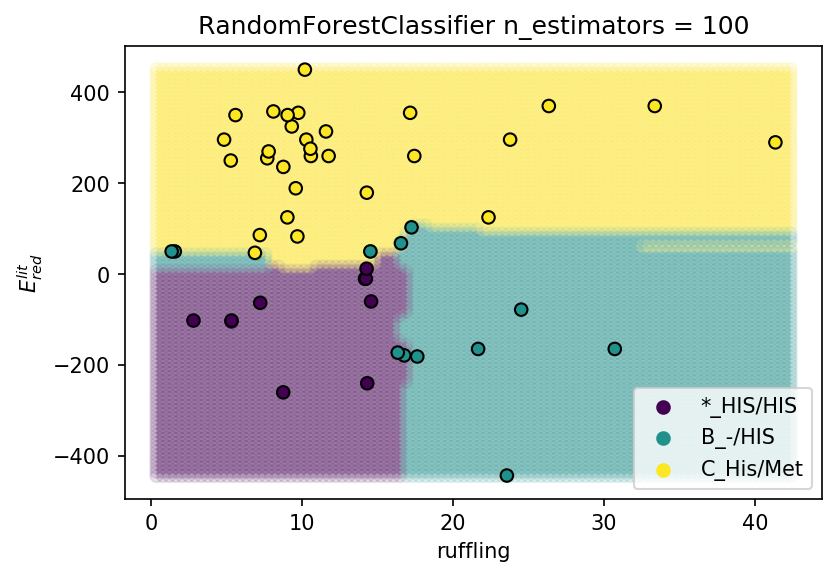

1     2     3     4     5     6     7     8     9     10  \
ruf,Em_lit      0.76  0.62  0.72  0.78  0.80  0.82  0.78  0.82  0.82  0.80   
ruf,sad,Em_lit  0.72  0.82  0.74  0.90  0.82  0.82  0.84  0.86  0.86  0.88   

                  11    12    13    14    15    16    17    18    19  
ruf,Em_lit      0.84  0.82  0.78  0.80  0.76  0.86  0.86  0.88  0.88  
ruf,sad,Em_lit  0.88  0.80  0.82  0.84  0.86  0.88  0.90  0.86  0.88

In [53]:
fig  =plt.figure(dpi = 150)
X = df[["ruffling","saddling","Em_lit"]]
X = df[["ruffling","Em_lit"]]

krange = [kn for kn in range(1,20)]
#krange = [1]
df1 = []
df2 = [krange]
for X in [df[["ruffling","saddling","Em_lit"]], df[["ruffling","Em_lit"]]]:
    y = df[["Kategorie2"]]
    y = [dic[i]for i in df["Kategorie2"]]

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)

    scaler = StandardScaler()
    scaler.fit(X)

    X_trains = scaler.transform(X_train)
    X_tests = scaler.transform(X_test)
    Xs = scaler.transform(X)
    df1.append([np.mean(cross_val_score(RandomForestClassifier(n_estimators = kn), Xs, y, cv = KFold(n_splits = 10))) for kn in krange])
    df2.append([np.mean(cross_val_score(RandomForestClassifier(n_estimators = kn), Xs, y, cv = KFold(n_splits = 10))) for kn in krange])
    #plt.plot([np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=kn), Xs, y, cv = KFold(n_splits = 10))) for kn in krange])
d = pd.DataFrame(np.array(df1), index= ["ruf,Em_lit","ruf,sad,Em_lit"])
d2 = pd.DataFrame(np.array(df2), index= ["estimator","ruf,Em_lit","ruf,sad,Em_lit"])
d.columns=krange

model = RandomForestClassifier()
model.fit(X_trains, y_train)
pred = model.predict(Xs)
xx,yy,dft  =p2(Xs)
pred2 = model.predict(dft)

xx,yy =p2(X)[:2]
plt.scatter(xx.ravel(),yy.ravel(),c =pred2,alpha=0.1)
#plt.scatter(*p2(X)[:2],c =pred2,alpha=0.1)

#plt.scatter(Xs[:,0],Xs[:,1],c = y,edgecolor ="black")
plt.scatter(X.values[:,0],X.values[:,1],c = y,edgecolor ="black")
plt.xlabel(ruffling)
plt.ylabel(redox)
plt.title(f"RandomForestClassifier n_estimators = {model.n_estimators}")



for a,h in zip(range(0,3),[HH,BHIS,CHM]):
    dfc = df[df["Kategorie2"]==h]
    cmap = matplotlib.cm.get_cmap('viridis')
    #plt.sc
    rgba = cmap(0.5*a)
    print(rgba,a)
    #plt.scatter([2],[a],c=[rgba],label=[HH,BHIS,CHM][a],alpha=1,vmax=40,zorder=-40)
    plt.scatter(dfc.iloc[0][["ruffling"]],dfc.iloc[0][["Em_lit"]],c=[rgba],label=[HH,BHIS,CHM][a],alpha=1,vmax=40,zorder=-40)

    
plt.legend()
plt.savefig(f"{plots}RandomForest.png")
plt.show()
d.to_csv(f"{plotab}Randomforest.csv")

d    

In [54]:

krange = [kn for kn in range(1,20)]
df2 = [krange]

index1=[]

for X in [df[["ruffling","saddling","Em_lit"]], df[["ruffling","Em_lit"]],df[["saddling","Em_lit"]],df[["ruffling","saddling"]]]:
    index1.append(str(list(X.columns)))
    y = df[["Kategorie2"]]
    y = [dic[i]for i in df["Kategorie2"]]

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)

    scaler = StandardScaler()
    scaler.fit(X)

    X_trains = scaler.transform(X_train)
    X_tests = scaler.transform(X_test)
    Xs = scaler.transform(X)
    df1.append([np.mean(cross_val_score(RandomForestClassifier(n_estimators = kn), Xs, y, cv = KFold(n_splits = 10))) for kn in krange])
   # df2.append([np.mean(cross_val_score(RandomForestClassifier(n_estimators = kn), Xs, y, cv = KFold(n_splits = 10))) for kn in krange])
#d2 = pd.DataFrame(np.array(df2), index= ["estimator"]+index1)
d1 = pd.DataFrame(np.array(df1), index= index1)

d.columns=krange




d.to_csv(f"{plots}tab_RandomForest.csv ")
d

ValueError: Shape of passed values is (6, 19), indices imply (4, 19)

In [ ]:
[df[["ruffling","saddling","Em_lit"]], df[["ruffling","Em_lit"]],df[["saddling","Em_lit"]],df[["ruffling","saddling"]]]

(0.267004, 0.004874, 0.329415, 1.0) 0
(0.127568, 0.566949, 0.550556, 1.0) 1
(0.993248, 0.906157, 0.143936, 1.0) 2


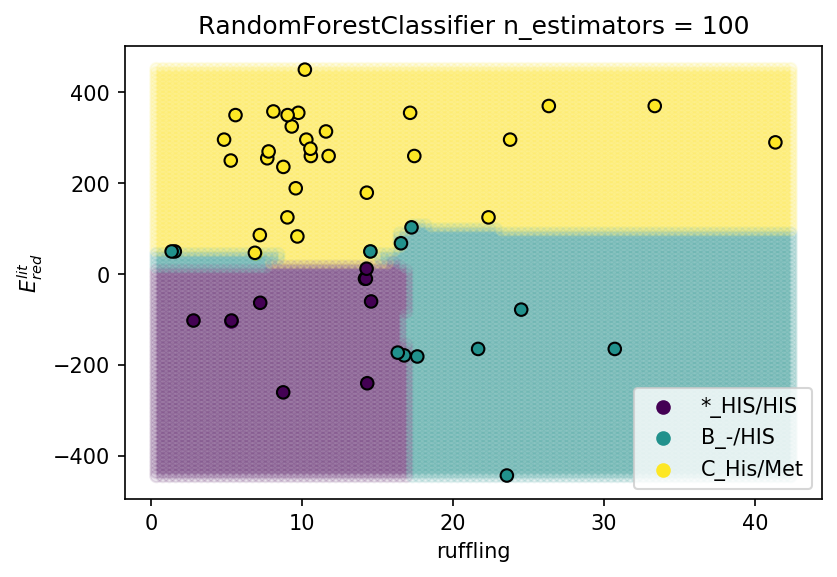

In [15]:
fig  =plt.figure(dpi = 150)
X = df[["ruffling","saddling","Em_lit"]]
X = df[["ruffling","Em_lit"]]

krange = [kn for kn in range(1,20)]
#krange = [1]
df1 = []
df2 = [krange]
for X in [df[["ruffling","saddling","Em_lit"]], df[["ruffling","Em_lit"]]]:
    y = df[["Kategorie2"]]
    y = [dic[i]for i in df["Kategorie2"]]

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)

    scaler = StandardScaler()
    scaler.fit(X)

    X_trains = scaler.transform(X_train)
    X_tests = scaler.transform(X_test)
    Xs = scaler.transform(X)
    df1.append([np.mean(cross_val_score(RandomForestClassifier(n_estimators = kn), Xs, y, cv = KFold(n_splits = 10))) for kn in krange])
    df2.append([np.mean(cross_val_score(RandomForestClassifier(n_estimators = kn), Xs, y, cv = KFold(n_splits = 10))) for kn in krange])
    #plt.plot([np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=kn), Xs, y, cv = KFold(n_splits = 10))) for kn in krange])
d = pd.DataFrame(np.array(df1), index= ["ruf,Em_lit","ruf,sad,Em_lit"])
d2 = pd.DataFrame(np.array(df2), index= ["estimator","ruf,Em_lit","ruf,sad,Em_lit"])
d.columns=krange

model = RandomForestClassifier()
model.fit(X_trains, y_train)
pred = model.predict(Xs)
xx,yy,dft  =p2(Xs)
pred2 = model.predict(dft)

xx,yy =p2(X)[:2]
plt.scatter(xx.ravel(),yy.ravel(),c =pred2,alpha=0.1)
#plt.scatter(*p2(X)[:2],c =pred2,alpha=0.1)

#plt.scatter(Xs[:,0],Xs[:,1],c = y,edgecolor ="black")
plt.scatter(X.values[:,0],X.values[:,1],c = y,edgecolor ="black")
plt.xlabel(ruffling)
plt.ylabel(redox)
plt.title(f"RandomForestClassifier n_estimators = {model.n_estimators}")



for a,h in zip(range(0,3),[HH,BHIS,CHM]):
    dfc = df[df["Kategorie2"]==h]
    cmap = matplotlib.cm.get_cmap('viridis')
    #plt.sc
    rgba = cmap(0.5*a)
    print(rgba,a)
    #plt.scatter([2],[a],c=[rgba],label=[HH,BHIS,CHM][a],alpha=1,vmax=40,zorder=-40)
    plt.scatter(dfc.iloc[0][["ruffling"]],dfc.iloc[0][["Em_lit"]],c=[rgba],label=[HH,BHIS,CHM][a],alpha=1,vmax=40,zorder=-40)

    
plt.legend()
plt.show()


In [16]:
cmap = matplotlib.cm.get_cmap('brg')
#plt.sc
rgba = cmap(2)
print(rgba)

(0.01568627450980392, 0.0, 0.9843137254901961, 1.0)


(0.267004, 0.004874, 0.329415, 1.0) 0
(0.127568, 0.566949, 0.550556, 1.0) 1
(0.993248, 0.906157, 0.143936, 1.0) 2


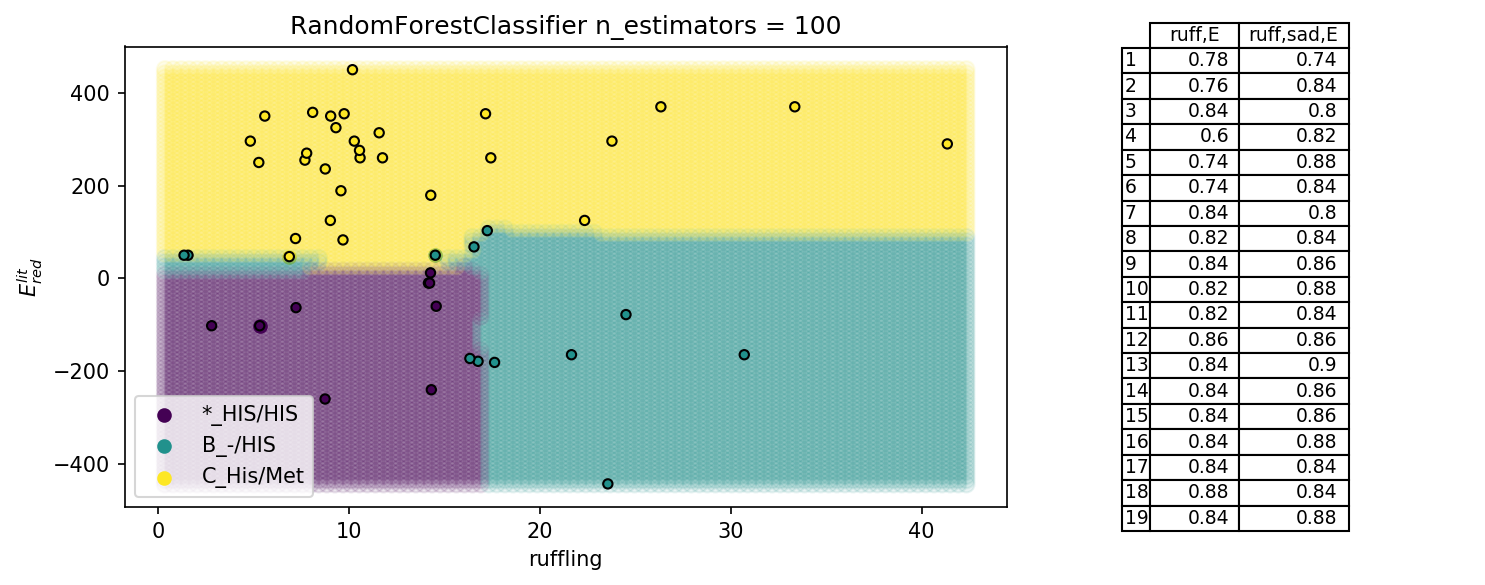

In [17]:


# generate some data

y =df["Kat"]
# plot it
fig = plt.figure(figsize=(10,4),dpi=150) 
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1]) 
ax0 = plt.subplot(gs[0])
ax0.scatter(xx.ravel(),yy.ravel(),c =pred2,alpha=0.1,s=60)

ax0.scatter(X.values[:,0],X.values[:,1],c = y,edgecolor ="black",s=20)
ax1 = plt.subplot(gs[1])
ax1.table(d.round(4).T.values, loc='center',fontsize =200,rowLabels=[str(s+1)for s in range(19)],colLabels=["ruff,E","ruff,sad,E"],colWidths=[0.2,0.25])
ax1.axis("off")  
ax0.set_xlabel(ruffling)
ax0.set_ylabel(redox)
#ax0.set_title("Random Forest")
ax0.set_title(f"RandomForestClassifier n_estimators = {model.n_estimators}")
for a,h in zip(range(0,3),[HH,BHIS,CHM]):
    dfc = df[df["Kategorie2"]==h]
    cmap = matplotlib.cm.get_cmap('viridis')
    #plt.sc
    rgba = cmap(0.5*a)
    print(rgba,a)
    #plt.scatter([2],[a],c=[rgba],label=[HH,BHIS,CHM][a],alpha=1,vmax=40,zorder=-40)
    ax0.scatter(dfc.iloc[0][["ruffling"]],dfc.iloc[0][["Em_lit"]],c=[rgba],label=[HH,BHIS,CHM][a],alpha=1,vmax=40,zorder=-40)
ax0.legend()
plt.tight_layout()
fig.savefig(f"{plots}RandomForest.png" )

# K-Mean

In [20]:

fd ={-1:(0.267004, 0.004874, 0.329415, 1.0) ,0: (0.127568, 0.566949, 0.550556, 1.0) ,1 : (0.993248, 0.906157, 0.143936, 1.0) }

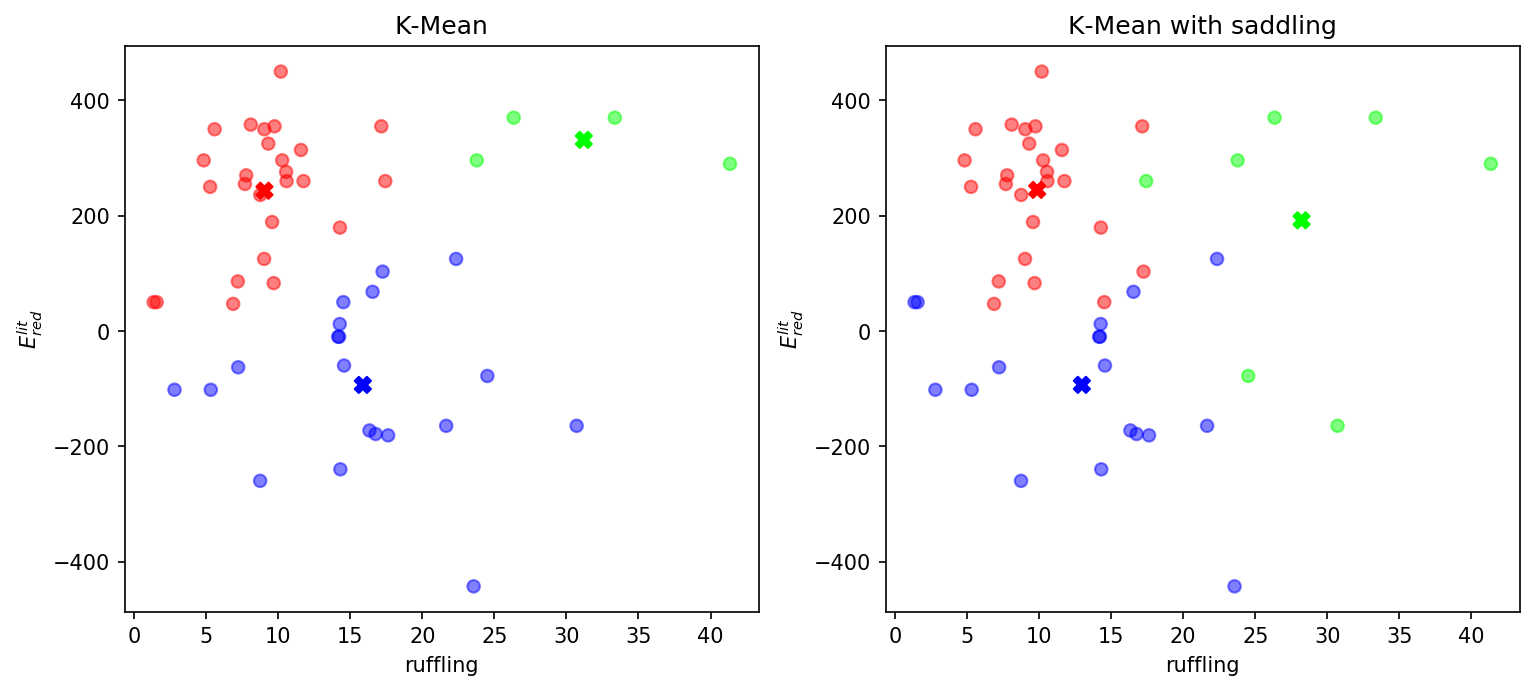

In [21]:


X = df[["ruffling", "Em_lit"]]
X = df[["ruffling", "Em_lit","saddling"]]
scaler =  StandardScaler()
x_transformed = scaler.fit_transform(X)


model  =KMeans(n_clusters = 3)
model.fit(x_transformed)
cluster1 = model.cluster_centers_
cluster2 = scaler.inverse_transform(model.cluster_centers_) 
fig = plt.figure(dpi=150,figsize = [12,5])
plt.subplot(122)

#plt.scatter(df["ruffling"],df["Em_lit"], c = df["Kat"])
#plt.scatter(x_transformed[:,0],x_transformed[:,1], c = model.labels_, alpha = 0.5)
#plt.scatter(cluster1[:,0],cluster1[:,1],marker = "X",s = 60, c = list(range(len(cluster1))) )
plt.scatter(X.values[:,0],X.values[:,1], c = model.labels_, alpha = 0.5,cmap = "brg")
plt.scatter(cluster2[:,0],cluster2[:,1],marker = "X",s = 60, c = list(range(len(cluster1))) ,cmap = "brg")

plt.title(model.inertia_)
#plt.legend()
plt.ylabel(redox)
plt.xlabel(ruffling)
plt.title(f"K-Mean with saddling")

#plt.savefig(f"{plots}Kmean.png")
plt.subplot(121)
plt.ylabel(ruffling)


X = df[["ruffling", "Em_lit"]]
#X = df[["ruffling", "Em_lit","saddling"]]
scaler =  StandardScaler()
x_transformed = scaler.fit_transform(X)


model  =KMeans(n_clusters = 3)
model.fit(x_transformed)
cluster1 = model.cluster_centers_
cluster2 = scaler.inverse_transform(model.cluster_centers_) 
#plt.figure(dpi=150)
#plt.scatter(df["ruffling"],df["Em_lit"], c = df["Kat"])
#plt.scatter(x_transformed[:,0],x_transformed[:,1], c = model.labels_, alpha = 0.5)
plt.scatter(X.values[:,0],X.values[:,1], c = model.labels_, alpha = 0.5,cmap = "brg")
#plt.scatter(X.values[:,0],X.values[:,1], c = model.labels_, alpha = 0.5,cmap = "brg",edgecolor = [fd[i] for i in df["Kat"]])
plt.scatter(cluster2[:,0],cluster2[:,1],marker = "X",s = 60, c = list(range(len(cluster1))) ,cmap = "brg")
plt.title(model.inertia_)
plt.xlabel(ruffling)
plt.ylabel(redox)
plt.title(f"K-Mean")
fig.savefig(f"{plots}K_mean2.png")

plt.show()


/home/hagen/anaconda3/envs/KLeich/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/hagen/anaconda3/envs/KLeich/lib/python3.7/site-packages/matplotlib/colors.py:235: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)
/home/hagen/anaconda3/envs/KLeich/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1120: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths 

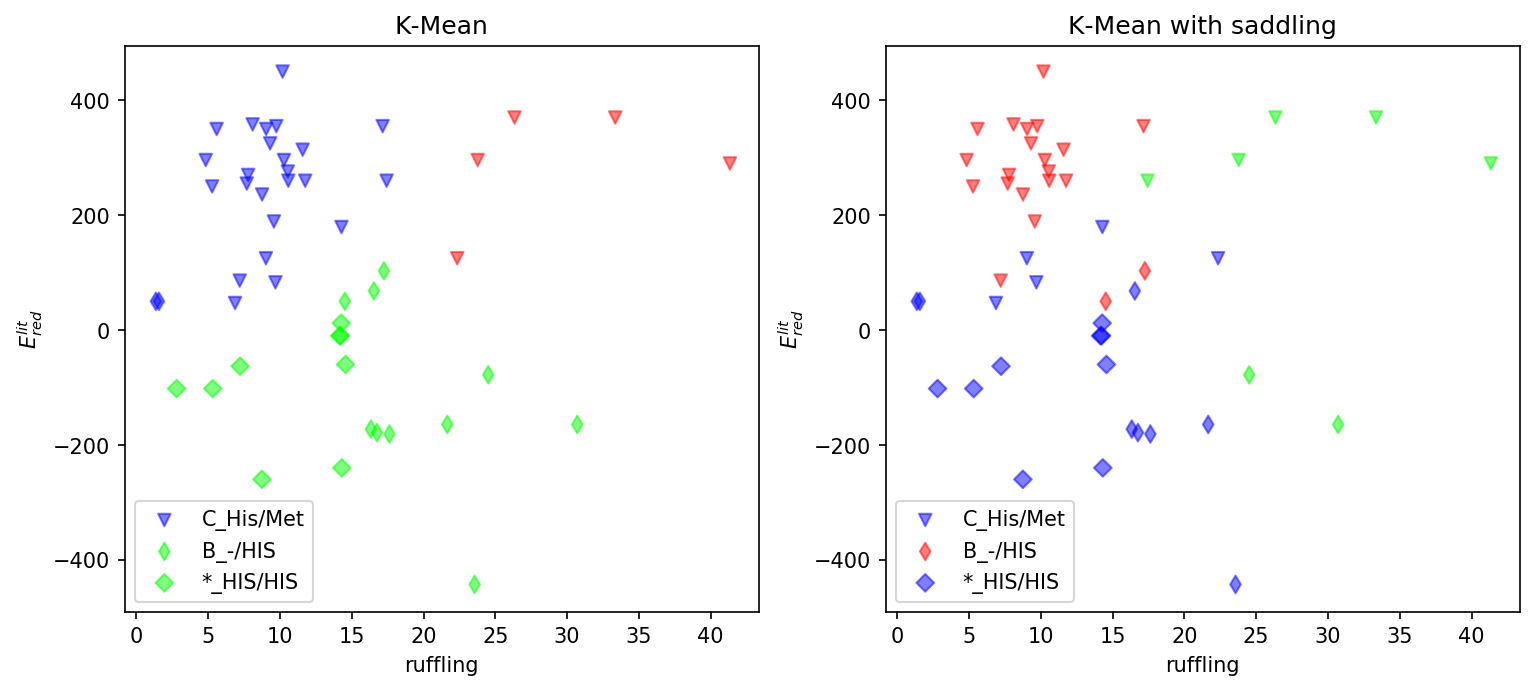

In [23]:
scatterdict = {HH:{"marker" :  "D"},
           BHIS:{"marker" :  "d"},
           CHM:{ "marker" :  "v"},
           "other":{"c":(0,0,0),"marker":"o"}}

cmap = matplotlib.cm.get_cmap('brg')
#plt.sc
rgba = cmap(2)
dic1 = {0:"red",1:"blue",2:"green"}
dic1 = {0:cmap(0),1:"red",2:cmap(255)}


X = df[["ruffling", "Em_lit"]]
X = df[["ruffling", "Em_lit","saddling"]]
scaler =  StandardScaler()
x_transformed = scaler.fit_transform(X)


model  =KMeans(n_clusters = 3)
model.fit(x_transformed)
cluster1 = model.cluster_centers_
cluster2 = scaler.inverse_transform(model.cluster_centers_) 
fig = plt.figure(dpi=150,figsize = [12,5])
plt.subplot(122)

#plt.scatter(df["ruffling"],df["Em_lit"], c = df["Kat"])
#plt.scatter(x_transformed[:,0],x_transformed[:,1], c = model.labels_, alpha = 0.5)
#plt.scatter(cluster1[:,0],cluster1[:,1],marker = "X",s = 60, c = list(range(len(cluster1))) )
df2 =df[["ruffling","saddling","Em_lit","Kategorie2"]]
df2["pred"]=model.labels_
model.labels_
for K in df2["Kategorie2"].value_counts().index:
    df3= df2[df2["Kategorie2"]==K]
    #plt.scatter(df3["ruffling"],df3["Em_lit"], c = [dic1[i] for i in df3["pred"]], alpha = 0.5,**scatterdict[K],cmap="brg")
    plt.scatter(df3["ruffling"],df3["Em_lit"], c = [dic1[i] for i in df3["pred"]], alpha = 0.5,**scatterdict[K],cmap="brg",label=K)

plt.title(model.inertia_)
#plt.legend()
plt.ylabel(redox)
plt.xlabel(ruffling)
plt.title(f"K-Mean with saddling")
plt.legend()

#plt.savefig(f"{plots}Kmean.png")
plt.subplot(121)
plt.ylabel(ruffling)


X = df[["ruffling", "Em_lit"]]
#X = df[["ruffling", "Em_lit","saddling"]]
scaler =  StandardScaler()
x_transformed = scaler.fit_transform(X)


model  =KMeans(n_clusters = 3)
model.fit(x_transformed)
cluster1 = model.cluster_centers_
cluster2 = scaler.inverse_transform(model.cluster_centers_) 
#plt.figure(dpi=150)
#plt.scatter(df["ruffling"],df["Em_lit"], c = df["Kat"])
#plt.scatter(x_transformed[:,0],x_transformed[:,1], c = model.labels_, alpha = 0.5)
df2 =df[["ruffling","saddling","Em_lit","Kategorie2"]]
df2["pred"]=model.labels_
model.labels_
for K in df2["Kategorie2"].value_counts().index:
    df3= df2[df2["Kategorie2"]==K]
    plt.scatter(df3["ruffling"],df3["Em_lit"], c = [dic1[i] for i in df3["pred"]], alpha = 0.5,**scatterdict[K],cmap="brg",label=K)
plt.title(model.inertia_)
plt.xlabel(ruffling)
plt.ylabel(redox)
plt.title(f"K-Mean")
plt.legend()
fig.savefig(f"{plots}K_mean2.png")

plt.show()


In [24]:
x=np.linspace(-300,300,1000)
#plt.scatter(x,x,c=x,cmap="brg")
cmap(1)

(0.00784313725490196, 0.0, 0.9921568627450981, 1.0)

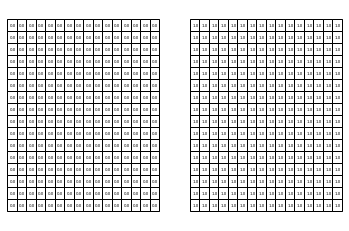

In [25]:
fig, axes = plt.subplots(1, 2)

a = np.empty((16, 16))

for i in range(0, 2):
    a.fill(i)
    the_table = axes[i].table( cellText=a,     loc='center',   )
    axes[i].axis("off")  

plt.show()

(0.0, 1.0, 0.0, 1.0)

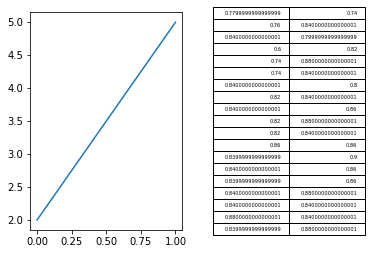

In [26]:
fig, axes = plt.subplots(1, 2)
axes[0].plot([2,5])
axes[1].table(d.T.values, loc='center',)
axes[1].axis("off")  


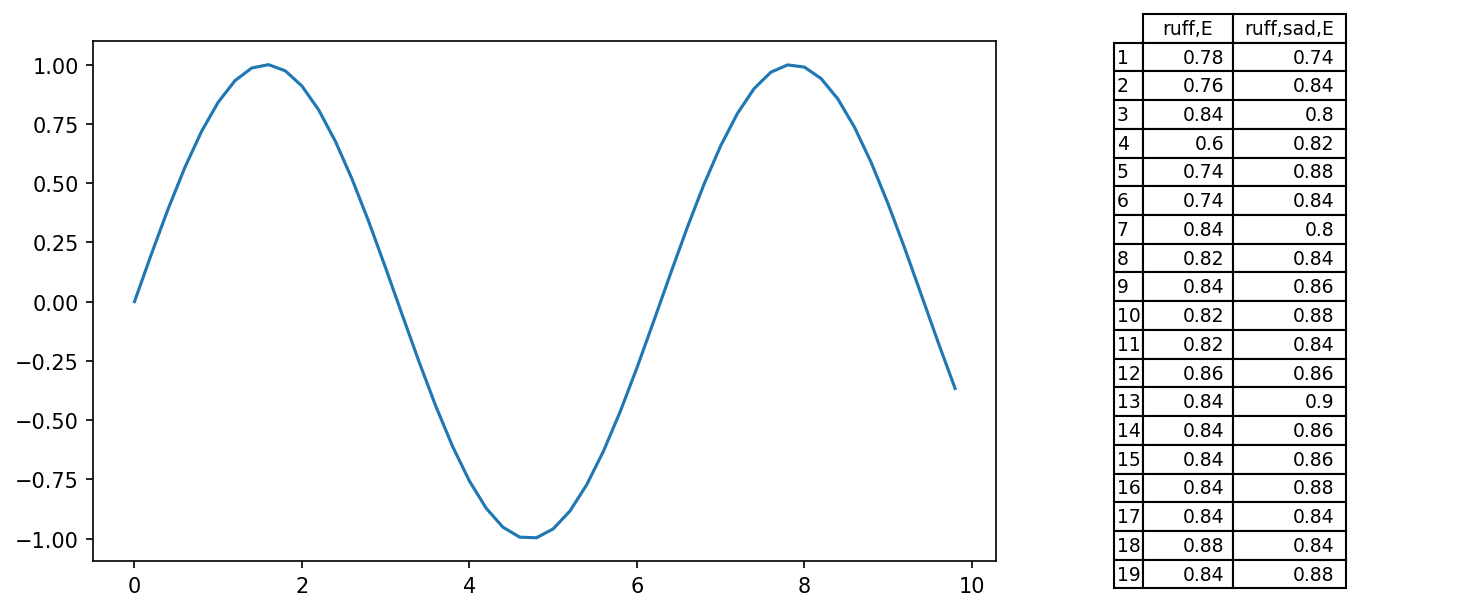

In [27]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import gridspec

# generate some data
x = np.arange(0, 10, 0.2)
y = np.sin(x)

# plot it
fig = plt.figure(figsize=(10,4),dpi=150) 
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1]) 
ax0 = plt.subplot(gs[0])
ax0.plot(x, y)
ax1 = plt.subplot(gs[1])
ax1.table(d.round(4).T.values, loc='center',fontsize =200,rowLabels=[str(s+1)for s in range(19)],colLabels=["ruff,E","ruff,sad,E"],colWidths=[0.2,0.25])
ax1.axis("off")  

plt.tight_layout()


In [28]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
d3 = d2.T

fig = make_subplots(
    rows=1, cols=2,
    shared_xaxes=True,
    vertical_spacing=0.03,
  #  specs=[[{"type": "table"}],
  #         [{"type": "scatter"}]]
    
    
    specs=[[{"type": "table"},{"type": "scatter"}]]
               

         #  [{"type": "scatter"}],
)
fig.add_trace(
    go.Table(
        header=dict(
            values = list(d3.columns),  # ["k", "ruff,sadd,emlit", "ruff,sadd,emlit"],
            font=dict(size=10),
            align="left"
        ),
        cells=dict(
            values=[d3[k].tolist() for k in d3.columns[:]],
            align = "left")
    ),
    row=1, col=1
)

fig.add_trace(
    #plt.scatter([2],[4]),
    go.Scatter(
        x=[1,2],
        y=[24,22],
        mode="lines",
        name="hash-rate-TH/s"
    ),
    row=1, col=2
)

In [30]:
scatterdict[HH]

{'marker': 'D'}